In [10]:
import pandas as pd



In [11]:
path="raw_data/Consolidado Estadísticas Hospitalarias2023.csv"
df = pd.read_csv(path, encoding="latin1", sep=";")


In [12]:
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)


In [13]:
df

,Cód. SS/SEREMI,Nombre SS/SEREMI,Cód. Estab.,Nombre Establecimiento,Cód. Nivel Cuidado,Nombre Nivel Cuidado,Glosa,Acum,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,0,Datos País,0,Datos País,0,Datos País,Dias Cama Disponibles,9449474,788535,712979,788889,767433,799365,789564,814885,812130,780005,803987,780998,810704
1,0,Datos País,0,Datos País,0,Datos País,Dias Cama Ocupados,7637838,624267,560868,634856,620434,670725,659473,660585,660658,627428,654053,637983,626508
2,0,Datos País,0,Datos País,0,Datos País,Dias de Estada,7496879,583773,548815,635478,580988,681685,657525,638441,658798,606820,625349,650315,628892
3,0,Datos País,0,Datos País,0,Datos País,Promedio Cama Disponibles,25888.97,25436.61,25463.54,25448.03,25581.1,25785.97,26318.8,26286.61,26197.74,26000.17,25935.06,26033.27,26151.74
4,0,Datos País,0,Datos País,0,Datos País,Numero de Egresos,994127,78763,72236,85839,79919,87591,86405,84351,87304,81122,83618,83178,83801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,33,Chiloé,133170,Hospital Comunitario de Queilén,401,401 - Área Médica Adulto Cuidados Básicos,Indice Ocupacional,68.08,39.52,80.36,68.55,52.5,86.29,72.5,86.29,76.61,73.33,52.42,66.67,62.9
14776,33,Chiloé,133170,Hospital Comunitario de Queilén,401,401 - Área Médica Adulto Cuidados Básicos,Promedio Días de Estada,8.41,2.71,21.29,10.58,4.75,5.5,7.67,6.43,28.5,3.33,7.25,5.57,6
14777,33,Chiloé,133170,Hospital Comunitario de Queilén,401,401 - Área Médica Adulto Cuidados Básicos,Indice de Rotación,26.25,1.75,1.75,3,3,2,3,1.75,1.5,3,2,1.75,1.75
14778,33,Chiloé,133170,Hospital Comunitario de Queilén,401,401 - Área Médica Adulto Cuidados Básicos,Letalidad,0.95,0,0,0,0,0,0,0,16.67,0,0,0,0


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
cols_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
df_meses = df[["Glosa"] + cols_meses]
dias_cama_disponibles = df_meses[df_meses['Glosa'] == 'Dias Cama Disponibles']
for col in cols_meses:
    df[col] = df[col].astype(str).str.replace('.', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
df_hospitales = df[df["Nombre Nivel Cuidado"] == "Datos Establecimiento"]

glosa = "Dias Cama Disponibles"
filtro = df_hospitales[df_hospitales["Glosa"] == glosa]

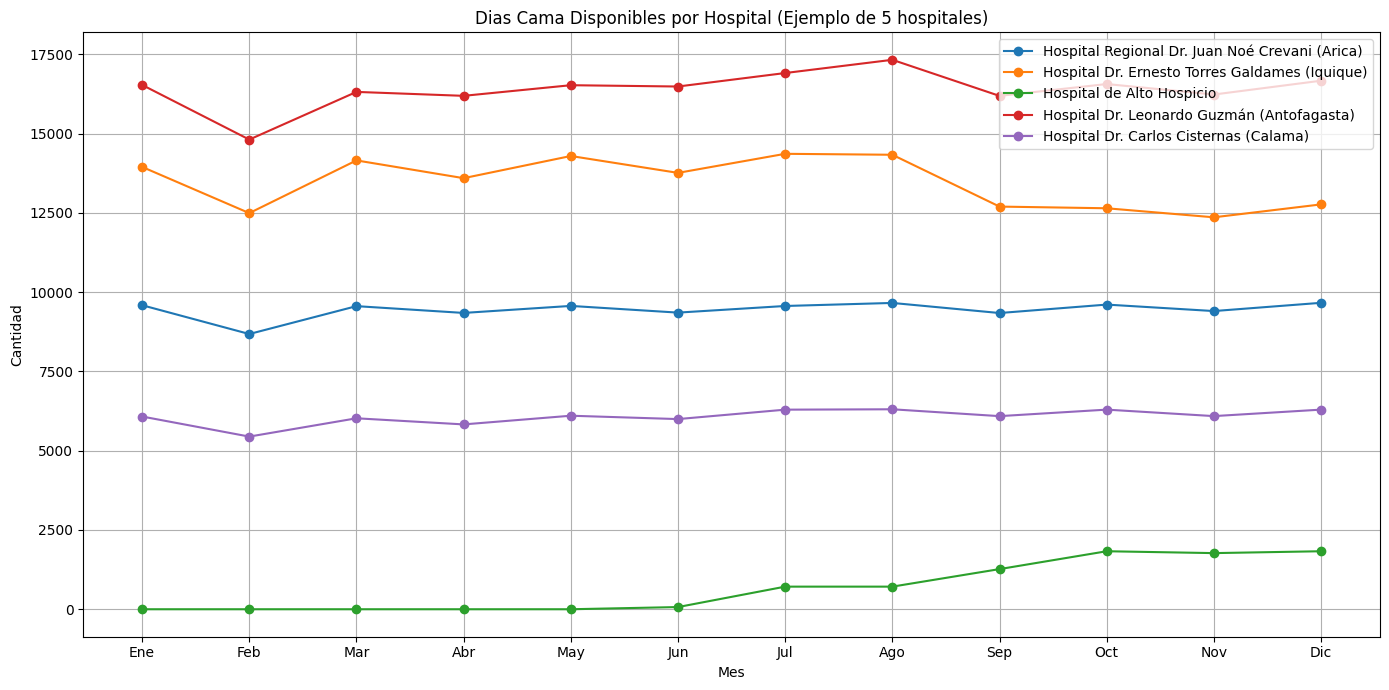

In [15]:
filtro = filtro.drop_duplicates(subset="Nombre Establecimiento").head(5)
plt.figure(figsize=(14, 7))
for i, row in filtro.iterrows():
    nombre = row["Nombre Establecimiento"]
    plt.plot(cols_meses, row[cols_meses], marker='o', label=nombre)

plt.title(f"{glosa} por Hospital (Ejemplo de 5 hospitales)")
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
hospitales_unicos = pd.DataFrame(df["Nombre Establecimiento"].unique(), columns=["Nombre Establecimiento"])
hospitales_unicos = hospitales_unicos.drop(index=[0, 1])
hospitales_unicos.to_csv("raw_data/hospitales_unicos_2023.csv", index=False)

In [17]:
glosa = "Dias Cama Disponibles"
df_hospitales = df[df["Nombre Nivel Cuidado"] == "Datos Establecimiento"]
df_glosa = df_hospitales[df_hospitales["Glosa"] == glosa]
zeros_por_hospital = df_glosa.set_index("Nombre Establecimiento")[cols_meses].eq(0).sum(axis=1)
hospitales_con_ceros = zeros_por_hospital[zeros_por_hospital > 0].sort_values(ascending=False)
hospitales_con_ceros

Nombre Establecimiento
Hospital Makewe                                                          10
Hospital de Licantén                                                      7
Hospital de Alto Hospicio                                                 5
Centro de Enfermedades Respiratorias Infantiles Josefina Martínez (D)     3
Hospital de Teno                                                          1
dtype: int64

In [18]:
zeros_por_hospital

Nombre Establecimiento
Hospital Regional Dr. Juan Noé Crevani (Arica)    0
Hospital Dr. Ernesto Torres Galdames (Iquique)    0
Hospital de Alto Hospicio                         5
Hospital Dr. Leonardo Guzmán (Antofagasta)        0
Hospital Dr. Carlos Cisternas (Calama)            0
                                                 ..
Hospital de Castro                                0
Hospital de Ancud                                 0
Hospital Comunitario de Achao                     0
Hospital de Quellón                               0
Hospital Comunitario de Queilén                   0
Length: 195, dtype: int64

In [19]:
df_2021=pd.read_csv("raw_data/hospitales_unicos/hospitales_unicos_2021.csv")
df_2022=pd.read_csv("raw_data/hospitales_unicos/hospitales_unicos_2022.csv")
df_2024=pd.read_csv("raw_data/hospitales_unicos/hospitales_unicos_2024.csv")
df_2025=pd.read_csv("raw_data/hospitales_unicos/hospitales_unicos_2025.csv")
df_2023=hospitales_unicos

In [20]:
merge = df_2023.merge(df_2022,  on="Nombre Establecimiento", how="inner"
                    ).merge(df_2024,  on="Nombre Establecimiento",how="inner"
                    ).merge(df_2024, on="Nombre Establecimiento", how="inner"
                    ).merge(df_2025, on="Nombre Establecimiento", how="inner"
                    ).merge(df_2021, on="Nombre Establecimiento", how="inner")
merge.to_csv("raw_data/hospitales_unicos_merge.csv", index=False)

In [21]:
glosa = "Dias Cama Disponibles"
df_filtrado = df[df["Nombre Establecimiento"].isin(merge["Nombre Establecimiento"])]


In [22]:
df_hospitales = df_filtrado[df_filtrado["Nombre Nivel Cuidado"] == "Datos Establecimiento"]
df_glosa = df_hospitales[df_hospitales["Glosa"] == glosa]
zeros_por_hospital = df_glosa.set_index("Nombre Establecimiento")[cols_meses].eq(0).sum(axis=1)
hospitales_con_ceros = zeros_por_hospital[zeros_por_hospital > 0].sort_values(ascending=False)
hospitales_con_ceros

Nombre Establecimiento
Hospital de Teno    1
dtype: int64

In [23]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline completo (aunque el preprocesado ya está hecho)
model = Pipeline([
    ('scaler', StandardScaler()),  # Opcional si los datos están normalizados
    ('xgb', XGBRegressor(
        objective='reg:squarederror',
        n_estimators=1000,
        max_depth=6,
        learning_rate=0.01,
        subsample=0.8,
        colsample_bytree=0.8,
        early_stopping_rounds=50,
        random_state=42
    ))
])

# Entrenamiento (asumiendo datos ya divididos)
model.fit(
    X_train, y_train,
    xgb__eval_set=[(X_val, y_val)],
    xgb__verbose=10
)

NameError: name 'X_train' is not defined

In [2]:
seremi_data = {
    'SEREMI': [
        'Aconcagua', 'Aisén', 'Antofagasta', 'Araucanía Norte', 'Araucanía Sur',
        'Arauco', 'Atacama', 'Biobío', 'Chiloé', 'Concepción', 'Coquimbo',
        'Del Libertador B.O Higgins', 'Del Maule', 'Del Reloncaví', 'Iquique',
        'Magallanes', 'Metropolitano Central', 'Metropolitano Norte',
        'Metropolitano Occidente', 'Metropolitano Oriente', 'Metropolitano Sur',
        'Metropolitano Sur Oriente', 'Osorno', 'Talcahuano', 'Valdivia',
        'Valparaíso San Antonio', 'Viña del Mar Quillota', 'Ñuble'
    ],
    'Latitud': [
        -32.8, -45.6, -23.6, -38.5, -39.0, -37.3, -27.4, -36.8, -42.6, -36.8,
        -30.0, -34.4, -35.4, -41.5, -20.2, -53.2, -33.5, -33.4, -33.5, -33.5,
        -33.6, -33.6, -40.6, -36.7, -39.8, -33.0, -32.9, -36.6
    ],
    'Longitud': [
        -70.7, -72.1, -70.4, -72.6, -72.3, -73.3, -70.7, -73.0, -73.9, -73.0,
        -71.3, -71.0, -71.7, -72.9, -69.8, -70.9, -70.7, -70.7, -70.9, -70.6,
        -70.7, -70.6, -73.1, -73.1, -73.2, -71.6, -71.5, -72.1
    ],
    'Region': [
        'Valparaíso', 'Aysén', 'Antofagasta', 'Araucanía', 'Araucanía',
        'Biobío', 'Atacama', 'Biobío', 'Los Lagos', 'Biobío', 'Coquimbo',
        "O'Higgins", 'Maule', 'Los Lagos', 'Tarapacá', 'Magallanes',
        'Metropolitana', 'Metropolitana', 'Metropolitana', 'Metropolitana',
        'Metropolitana', 'Metropolitana', 'Los Lagos', 'Biobío', 'Los Ríos',
        'Valparaíso', 'Valparaíso', 'Ñuble'
    ]
}
seremi_data2 = {
    'SEREMI': ['Los Ríos'],
    'Latitud': [-39.8],  # Latitud de Los Ríos
    'Longitud': [-73.2],  # Longitud de Los Ríos
    'Region': ['Los Ríos']  # Región correspondiente
}

In [4]:
import requests
import pandas as pd
from datetime import datetime
from tqdm import tqdm

def get_data_montly(latitud, longitud, año):
    """Versión funcionando con variables válidas"""
    base_url = "https://archive-api.open-meteo.com/v1/archive"
    resultados = []
    
    # Variables básicas que existen en la API
    variables_validas = [
        "temperature_2m_max",
        "temperature_2m_min", 
        "precipitation_sum",
        "winddirection_10m_dominant"
    ]
    if año==2025:
        ran=range(3,4)
    else:
        ran=range(1, 13)
    for mes in tqdm(ran, desc="Descargando datos"):
        try:
            # Configurar fechas
            fecha_inicio = datetime(año, mes, 1).strftime('%Y-%m-%d')
            ultimo_dia = 31 if mes in [1,3,5,7,8,10,12] else 30 if mes!=2 else 28
            fecha_fin = datetime(año, mes, ultimo_dia).strftime('%Y-%m-%d')
            
            # Parámetros corregidos
            params = {
                "latitude": latitud,
                "longitude": longitud,
                "start_date": fecha_inicio,
                "end_date": fecha_fin,
                "daily": variables_validas,  # Lista de variables válidas
                "timezone": "auto"
            }
            
            response = requests.get(base_url, params=params, timeout=30)
            
            # Verificar respuesta
            if response.status_code != 200:
                print(f"\nError en {fecha_inicio}: {response.text}")
                continue
                
            data = response.json()
            
            if 'daily' not in data:
                print(f"\nEstructura inesperada en {fecha_inicio}")
                continue
                
            # Procesamiento exitoso
            df = pd.DataFrame(data['daily'])
            df['time'] = pd.to_datetime(df['time'])
            df['Mes'] = fecha_inicio[:7]
            resultados.append(df)
            
        except Exception as e:
            print(f"\nError procesando {mes}/{año}: {str(e)}")
            continue
        data=pd.concat(resultados) if resultados else pd.DataFrame()
        promedios = data.groupby('Mes').agg({
        'temperature_2m_max': 'mean',
        'temperature_2m_min': 'mean',
        'precipitation_sum': 'sum',
        "winddirection_10m_dominant":'mean'
    })
    
    return promedios


In [26]:
datos2 = get_data_montly(
    latitud=-33.4489,  
    longitud=-70.6693,
    año=2025 )

Descargando datos: 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]


In [27]:
datos2

,temperature_2m_max,temperature_2m_min,precipitation_sum,winddirection_10m_dominant
Mes,,,,
2025-01,30.954839,16.645161,0.0,223.774194
2025-02,31.021429,16.896429,0.0,228.892857


In [28]:
datos

,temperature_2m_max,temperature_2m_min,precipitation_sum,winddirection_10m_dominant
Mes,,,,
2023-01,30.119355,14.922581,0.9,229.709677
2023-02,32.207143,16.989286,0.0,231.964286
2023-03,30.274194,15.400000,0.0,230.806452
2023-04,24.906667,12.946667,36.8,231.600000
2023-05,19.587097,10.487097,22.2,183.612903
2023-06,17.086667,9.016667,125.7,140.966667
2023-07,16.525806,8.232258,34.6,152.129032
2023-08,17.696774,8.870968,158.0,195.064516
2023-09,16.933333,8.720000,69.5,199.500000


In [1]:
def get_cords(nombre_seremi):
    seremi_data = {
    'SEREMI': [
        'Aconcagua', 'Aisén', 'Antofagasta', 'Araucanía Norte', 'Araucanía Sur',
        'Arauco', 'Atacama', 'Biobío', 'Chiloé', 'Concepción', 'Coquimbo',
        'Del Libertador B.O Higgins', 'Del Maule', 'Del Reloncaví', 'Iquique',
        'Magallanes', 'Metropolitano Central', 'Metropolitano Norte',
        'Metropolitano Occidente', 'Metropolitano Oriente', 'Metropolitano Sur',
        'Metropolitano Sur Oriente', 'Osorno', 'Talcahuano', 'Valdivia',
        'Valparaíso San Antonio', 'Viña del Mar Quillota', 'Ñuble', 'Los Ríos'
    ],
    'Latitud': [
        -32.8, -45.6, -23.6, -38.5, -39.0, -37.3, -27.4, -36.8, -42.6, -36.8,
        -30.0, -34.4, -35.4, -41.5, -20.2, -53.2, -33.5, -33.4, -33.5, -33.5,
        -33.6, -33.6, -40.6, -36.7, -39.8, -33.0, -32.9, -36.6, -39.8  # Latitud para Los Ríos
    ],
    'Longitud': [
        -70.7, -72.1, -70.4, -72.6, -72.3, -73.3, -70.7, -73.0, -73.9, -73.0,
        -71.3, -71.0, -71.7, -72.9, -69.8, -70.9, -70.7, -70.7, -70.9, -70.6,
        -70.7, -70.6, -73.1, -73.1, -73.2, -71.6, -71.5, -72.1, -73.2  # Longitud para Los Ríos
    ],
    'Region': [
        'Valparaíso', 'Aysén', 'Antofagasta', 'Araucanía', 'Araucanía',
        'Biobío', 'Atacama', 'Biobío', 'Los Lagos', 'Biobío', 'Coquimbo',
        "O'Higgins", 'Maule', 'Los Lagos', 'Tarapacá', 'Magallanes',
        'Metropolitana', 'Metropolitana', 'Metropolitana', 'Metropolitana',
        'Metropolitana', 'Metropolitana', 'Los Lagos', 'Biobío', 'Los Ríos',
        'Valparaíso', 'Valparaíso', 'Ñuble', 'Los Ríos'  # Región para Los Ríos
    ]
}

    
    index = seremi_data['SEREMI'].index(nombre_seremi)
    lat = seremi_data['Latitud'][index]
    lon = seremi_data['Longitud'][index]
    return lat, lon



In [5]:

    
def generate_csv_by_year_monthly(seremi, años):
    """
    Función principal que coordina el proceso completo
    
    Args:
        latitud (float): Coordenada de latitud
        longitud (float): Coordenada de longitud
        años (list): Lista de años a procesar
        variables (list): Variables climáticas a solicitar
        directorio_salida (str): Carpeta de destino para los archivos
    """
    
    latitud, longitud=get_cords(seremi)
    datos_año = []
    for año in tqdm(años, desc="Procesando años"):
        data_m=get_data_montly(latitud, longitud,año)
        datos_año.append(data_m)
    df_año=pd.concat(datos_año)
    path= f"raw_data/features/nuevo_clima/{seremi}.csv"    
    df_año.to_csv(path)
    return   df_año

In [31]:
get_cords("Aisén")

(-45.6, -72.1)

In [7]:
generate_csv_by_year_monthly(seremi='Aconcagua',
    años=[2020,2021,2022,2023,2024] )

Procesando años:   0%|          | 0/5 [00:05<?, ?it/s]


KeyboardInterrupt: 

In [6]:
dictio=[    'Aconcagua', 'Aisén', 'Antofagasta', 'Araucanía Norte', 'Araucanía Sur',
        'Arauco', 'Atacama', 'Biobío', 'Chiloé', 'Concepción', 'Coquimbo',
        'Del Libertador B.O Higgins', 'Del Maule', 'Del Reloncaví', 'Iquique',
        'Magallanes', 'Metropolitano Central', 'Metropolitano Norte',
        'Metropolitano Occidente', 'Metropolitano Oriente', 'Metropolitano Sur',
        'Metropolitano Sur Oriente', 'Osorno', 'Talcahuano', 'Valdivia',
        'Valparaíso San Antonio', 'Viña del Mar Quillota', 'Ñuble', 'Los Ríos'
        ]
for seremi in tqdm(dictio, desc="Procesando seremi"):
    generate_csv_by_year_monthly(seremi=seremi,
        años=[2025] )

Procesando seremi:   0%|          | 0/29 [00:00<?, ?it/s]

Procesando seremi:   3%|▎         | 1/29 [00:00<00:22,  1.22it/s]

Procesando seremi:   7%|▋         | 2/29 [00:01<00:22,  1.22it/s]

Procesando seremi:  10%|█         | 3/29 [00:02<00:21,  1.22it/s]

Procesando seremi:  14%|█▍        | 4/29 [00:03<00:19,  1.26it/s]

Procesando seremi:  17%|█▋        | 5/29 [00:04<00:19,  1.20it/s]

Procesando seremi:  21%|██        | 6/29 [00:04<00:18,  1.22it/s]

Procesando seremi:  24%|██▍       | 7/29 [00:05<00:18,  1.20it/s]

Procesando seremi:  28%|██▊       | 8/29 [00:06<00:17,  1.19it/s]

Procesando seremi:  31%|███       | 9/29 [00:07<00:16,  1.21it/s]

Procesando seremi:  34%|███▍      | 10/29 [00:08<00:15,  1.25it/s]

Procesando seremi:  38%|███▊      | 11/29 [00:08<00:14,  1.26it/s]

Procesando seremi:  41%|████▏     | 12/29 [00:09<00:13,  1.26it/s]

Procesando seremi:  45%|████▍     | 13/29 [00:10<00:12,  1.25it/s]

Procesando seremi:  48%|████▊     | 14/29 [00:11<00:12,  1.24it/s]

In [40]:
import os
df_list = []
for archivo in os.listdir("raw_data/features/"):
    if archivo.endswith('.csv'):
        nombre_seremi = os.path.splitext(archivo)[0]
        df = pd.read_csv(os.path.join("raw_data/features/", archivo))
        df['SEREMI'] = nombre_seremi
        df_list.append(df)
df_total = pd.concat(df_list)

df_total.to_csv('todos_los_seremi.csv')

In [9]:
df_list = []
df = pd.read_csv(os.path.join("raw_data/features/", archivo))
df_list.append(df)
df_list.append(df)
df_total = pd.concat(df_list)

NameError: name 'os' is not defined

In [10]:
df_total

NameError: name 'df_total' is not defined